# <p style="font-family: tahoma ; color: cyan; text-align: center;"><b>Glue Data Set Practice</b></p>

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl

import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [25]:
glue = sns.load_dataset("glue")
glue

# GLUE is a benchmark designed to evaluate and compare the performance of different language models across multiple tasks.
# Within, we can compare language models' performance, year trend to see if models improving year over year, understand how different encoder architecture perform, observe which language is better at which task, etc.

,Model,Year,Encoder,Task,Score
0,ERNIE,2019,Transformer,CoLA,75.5
1,T5,2019,Transformer,CoLA,71.6
2,RoBERTa,2019,Transformer,CoLA,67.8
3,BERT,2018,Transformer,CoLA,60.5
4,BiLSTM+ELMo,2018,LSTM,CoLA,32.1
...,...,...,...,...,...
59,BERT,2018,Transformer,RTE,70.1
60,BiLSTM+ELMo,2018,LSTM,RTE,57.4
61,BiLSTM+CoVe,2017,LSTM,RTE,52.7
62,BiLSTM+Attn,2017,LSTM,RTE,58.4


<p style="font-family: tahoma ; color: green;"><b>How many unique models are in the dataset?</b></p>

In [26]:
glue["Model"].unique() # List of each Model

array(['ERNIE', 'T5', 'RoBERTa', 'BERT', 'BiLSTM+ELMo', 'BiLSTM+CoVe',
       'BiLSTM+Attn', 'BiLSTM'], dtype=object)

In [27]:
glue["Model"].nunique() # Count of each different Models

8

<p style="font-family: tahoma ; color: green;"><b>Which years are represented in the dataset, and which is the earliest/latest year?</b></p>

In [28]:
glue["Year"].unique() # Years models developed

array([2019, 2018, 2017])

In [29]:
glue["Year"].min() # Earliest year

2017

In [30]:
glue["Year"].max() # Latest year

2019

<p style="font-family: tahoma ; color: green;"><b>What are the unique tasks included in the GLUE dataset?</b></p>

In [31]:
glue["Task"].unique() # List of each Task

array(['CoLA', 'SST-2', 'MRPC', 'STS-B', 'QQP', 'MNLI', 'QNLI', 'RTE'],
      dtype=object)

In [32]:
glue["Task"].nunique() # Count of each different Tasks

8

<p style="font-family: tahoma ; color: green;"><b>Find the maximum and minimum score overall.?</b></p>

In [33]:
glue["Score"].min() # Minimum score overall

11.6

In [34]:
glue["Score"].max() # Maximum score overall

97.8

<p style="font-family: tahoma ; color: green;"><b>Which model achieved the highest score overall?</b></p>

In [35]:
glue.loc[glue['Score'].idxmax()]

Model            ERNIE
Year              2019
Encoder    Transformer
Task             SST-2
Score             97.8
Name: 8, dtype: object

In [36]:
glue[glue["Score"] == glue["Score"].max()][["Model","Year","Encoder","Task","Score"]]

,Model,Year,Encoder,Task,Score
8,ERNIE,2019,Transformer,SST-2,97.8


<p style="font-family: tahoma ; color: orange;"><b>Calculate the average score per model across all tasks.</b></p>

In [37]:
glue.groupby("Model")["Score"].agg("mean").sort_values(ascending = False)

Model
ERNIE          89.7000
T5             89.0000
RoBERTa        87.2125
BERT           81.7375
BiLSTM+ELMo    67.2000
BiLSTM+Attn    64.8375
BiLSTM         63.3250
BiLSTM+CoVe    61.6250
Name: Score, dtype: float64

<p style="font-family: tahoma ; color: orange;"><b>Calculate the average score per task across all models.</b></p>

In [38]:
glue.groupby("Task")["Score"].agg("mean").sort_values(ascending = False)

Task
SST-2    90.4875
MRPC     87.1750
QNLI     84.6875
STS-B    80.4625
MNLI     78.4750
RTE      71.2000
QQP      67.6250
CoLA     44.5250
Name: Score, dtype: float64

<p style="font-family: tahoma ; color: orange;"><b>For each year, compute the average score of all models released that year.</b></p>

In [39]:
glue.groupby("Year")["Score"].agg("mean").sort_values(ascending = False)

Year
2019    88.63750
2018    74.46875
2017    63.26250
Name: Score, dtype: float64

<p style="font-family: tahoma ; color: orange;"><b>Which task has the highest overall average score? Which has the lowest?</b></p>

In [40]:
task_means = glue.groupby("Task")["Score"].mean()
highest = task_means.idxmax(), task_means.max()
lowest = task_means.idxmin(), task_means.min()
highest, lowest

(('SST-2', 90.4875), ('CoLA', 44.525))

<p style="font-family: tahoma ; color: orange;"><b>Compare the average performance of encoder types (e.g., Transformer vs others).</b></p>

In [41]:
glue.groupby("Encoder")["Score"].mean()

Encoder
LSTM           64.246875
Transformer    86.912500
Name: Score, dtype: float64

<p style="font-family: tahoma ; color: orange;"><b>For each model, find its best performing task (task with highest score).</b></p>

In [42]:
glue.groupby("Model").apply(lambda x: x.loc[x["Score"].idxmax(), ["Task", "Score"]])

,Task,Score
Model,,
BERT,SST-2,94.9
BiLSTM,SST-2,82.8
BiLSTM+Attn,MRPC,83.9
BiLSTM+CoVe,SST-2,81.9
BiLSTM+ELMo,SST-2,89.3
ERNIE,SST-2,97.8
RoBERTa,SST-2,96.7
T5,SST-2,97.5


<p style="font-family: tahoma ; color: orange;"><b>Find the trend over years: do average scores increase, decrease, or stay flat?</b></p>

In [43]:
glue["Year_Mean"] = glue.groupby("Year")["Score"].transform("mean") # Added year's average as new column
glue["Model_Mean"] = glue.groupby("Model")["Score"].transform("mean") # Added model's average as new column
glue["Encoder_Mean"] = glue.groupby("Encoder")["Score"].transform("mean") # Added encoder's average as new column
glue.head()

,Model,Year,Encoder,Task,Score,Year_Mean,Model_Mean,Encoder_Mean
0,ERNIE,2019,Transformer,CoLA,75.5,88.63750,89.7000,86.912500
1,T5,2019,Transformer,CoLA,71.6,88.63750,89.0000,86.912500
2,RoBERTa,2019,Transformer,CoLA,67.8,88.63750,87.2125,86.912500
3,BERT,2018,Transformer,CoLA,60.5,74.46875,81.7375,86.912500
4,BiLSTM+ELMo,2018,LSTM,CoLA,32.1,74.46875,67.2000,64.246875


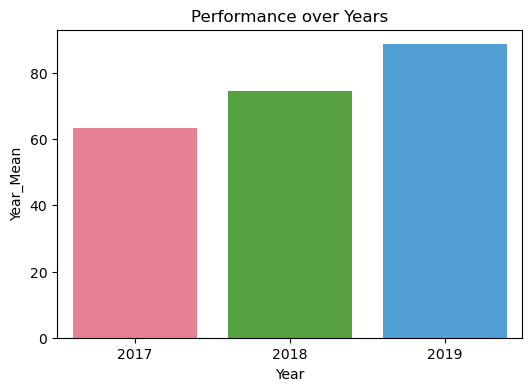

In [44]:
plt.figure(figsize = (6,4))
sns.barplot(glue, x = "Year", y = "Year_Mean", palette = "husl")
plt.title("Performance over Years")
plt.show() # Performance is increasing year over year

<p style="font-family: tahoma ; color: orange;"><b>For a chosen task (e.g., "STT-2"), rank all models by their score.</b></p>

In [45]:
task_score = glue[glue["Task"] == "MRPC"].sort_values("Score", ascending = False)
task_score[["Model","Score"]]

,Model,Score
16,ERNIE,93.9
17,T5,92.8
18,RoBERTa,92.3
19,BERT,89.3
20,BiLSTM+ELMo,84.7
22,BiLSTM+Attn,83.9
23,BiLSTM,81.8
21,BiLSTM+CoVe,78.7


<p style="font-family: tahoma ; color: orange;"><b>Plot a bar chart showing average scores of each encoder type.</b></p>

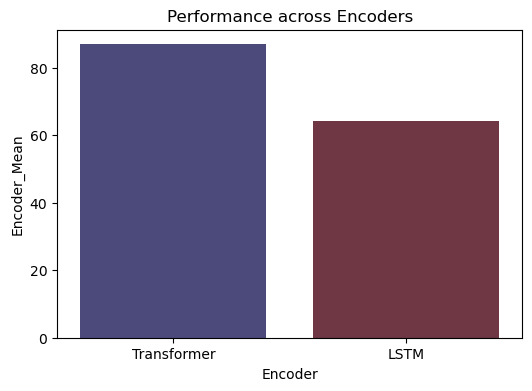

In [46]:
plt.figure(figsize = (6,4))
sns.barplot(glue, x = "Encoder", y = "Encoder_Mean", palette = "icefire")
plt.title("Performance across Encoders")
plt.show()

<p style="font-family: tahoma ; color: orange;"><b>Which model shows the largest variation (range) in performance across tasks?</b></p>

In [47]:
variation = glue.groupby("Model")["Score"].agg(lambda x: x.max() - x.min())
variation.idxmax(), variation.max()

('BiLSTM', 71.2)

<p style="font-family: tahoma ; color: red;"><b>Calculate the standard deviation of scores per task — which task is the hardest (highest variability)?</b></p>

In [51]:
task_std = glue.groupby("Task")["Score"].std().sort_values(ascending = False)
task_std

Task
CoLA     26.931858
RTE      17.327517
MNLI     12.989969
STS-B    12.123641
QNLI     11.796542
QQP       7.097837
SST-2     7.081452
MRPC      5.672175
Name: Score, dtype: float64

In [53]:
task_std.idxmax(), task_std.max()

('CoLA', 26.93185845796758)

<p style="font-family: tahoma ; color: red;"><b>Use a heatmap: Models on the y-axis, Tasks on the x-axis, Scores as the color. What insights do you get?</b></p>

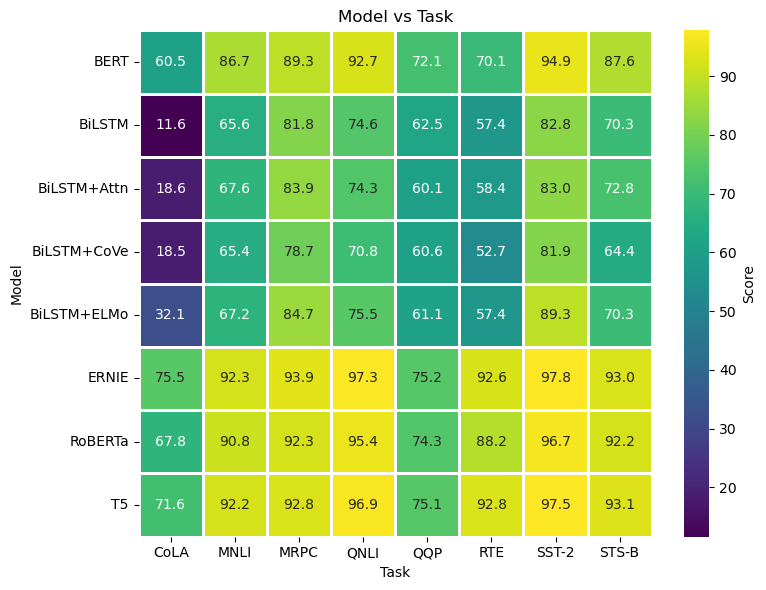

In [70]:
pivot = glue.pivot_table(index = "Model", columns = "Task", values = "Score", aggfunc = "mean")

plt.figure(figsize = (8,6))
sns.heatmap(pivot, annot = True, cmap = "viridis", fmt = ".1f", linewidths = 1, cbar_kws = {"label" : "Score"})
plt.title("Model vs Task")
plt.ylabel("Model")
plt.xlabel("Task")
plt.tight_layout()

plt.show()

<p style="font-family: tahoma ; color: red;"><b>Compare Transformers vs Non-Transformers: are Transformers consistently better?</b></p>

<p style="font-family: tahoma ; color: red;"><b>Create a barplot of year vs. average score per model — does performance over time look exponential or linear?</b></p>

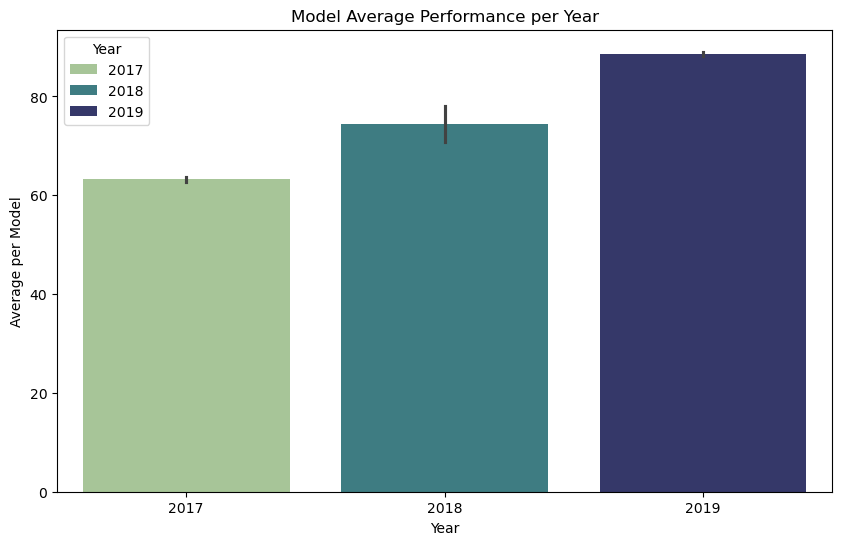

In [94]:
plt.figure(figsize = (10,6))
sns.barplot(glue, x = "Year", y = "Model_Mean", hue = "Year", palette = "crest")
plt.title("Model Average Performance per Year")
plt.ylabel("Average per Model")

plt.show()

<p style="font-family: tahoma ; color: red;"><b>Which task has the most models achieving near-perfect performance (score > 90)?</b></p>

In [95]:
perf_score = glue[glue["Score"] > 90]

perf_score.groupby("Task")["Model"].nunique().sort_values(ascending = False)

Task
SST-2    4
QNLI     4
MRPC     3
MNLI     3
STS-B    3
RTE      2
Name: Model, dtype: int64

<p style="font-family: tahoma ; color: red;"><b>For each encoder, calculate the best model’s score - worst model’s score (spread). Which encoder is the most consistent?</b></p>

In [102]:
scores = glue.groupby(["Encoder","Model"])["Score"].mean().reset_index()
scores

,Encoder,Model,Score
0,LSTM,BiLSTM,63.3250
1,LSTM,BiLSTM+Attn,64.8375
2,LSTM,BiLSTM+CoVe,61.6250
3,LSTM,BiLSTM+ELMo,67.2000
4,Transformer,BERT,81.7375
5,Transformer,ERNIE,89.7000
6,Transformer,RoBERTa,87.2125
7,Transformer,T5,89.0000


In [108]:
spread = scores.groupby("Encoder")["Score"].agg(["max","min"])
spread["spread"] = spread["max"] - spread["min"]
spread.sort_values("spread")

,max,min,spread
Encoder,,,
LSTM,67.2,61.6250,5.5750
Transformer,89.7,81.7375,7.9625


<p style="font-family: tahoma ; color: red;"><b>Build a boxplot of scores by task. Which tasks are most/least “balanced” across models?</b></p>

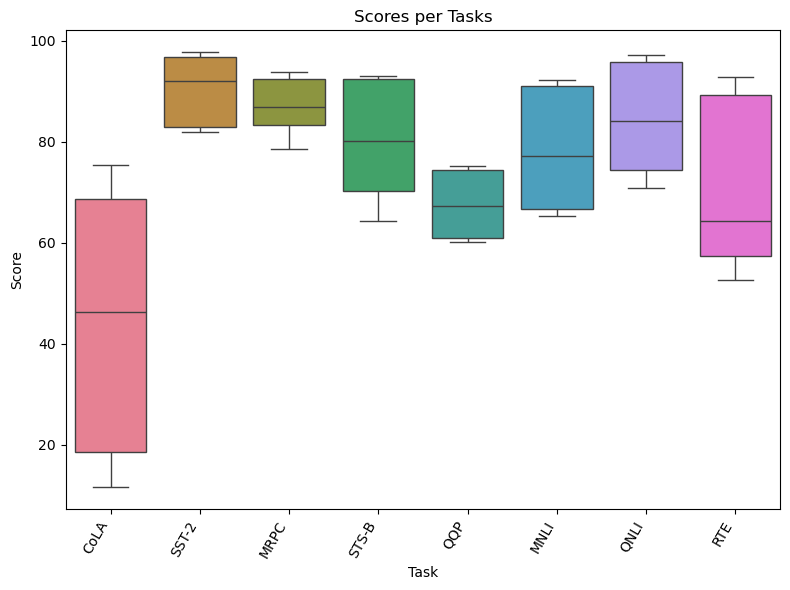

In [118]:
# Create the plot

plt.figure(figsize = (8,6))
sns.boxplot(glue, x = "Task", y = "Score", palette = "husl")
plt.xticks(rotation = 60, ha = "right")
plt.title("Scores per Tasks")
plt.tight_layout()

plt.show()

In [123]:
# Find the most balanced via IQR

balanced = glue.groupby("Task")["Score"].agg(lambda x: x.quantile(0.75) - x.quantile(0.25)).sort_values()

balanced.idxmin(), balanced.min()

('MRPC', 9.049999999999997)

<p style="font-family: tahoma ; color: red;"><b>Identify the overall champion model: the one with the highest average score across all tasks.</b></p>

In [126]:
champion = glue.groupby("Model")["Score"].mean().sort_values(ascending = False)
champion

Model
ERNIE          89.7000
T5             89.0000
RoBERTa        87.2125
BERT           81.7375
BiLSTM+ELMo    67.2000
BiLSTM+Attn    64.8375
BiLSTM         63.3250
BiLSTM+CoVe    61.6250
Name: Score, dtype: float64

In [128]:
champion.idxmax(), champion.max()

('ERNIE', 89.7)